# TS5

## Ejercicio 1

Los sistemas de antenas de transmisión de tipo Phased Array, son un tipo particular de antena que permiten controlar la dirección del haz emitido sin desplazamientos mecánicos. Se trata en esencia de múltiples antenas que reciben la misma señal de entrada, aunque afectada por desfasajes diferentes. Así, modificando los desfasajes y por efectos de interferencia constructiva o destructiva, se logra modificar el ángulo de apuntamiento sin requerir desplazamientos mecánicos.

Se desea diseñar desfasadores pasivos para un sistema de este tipo que opera en banda ancha, buscándose que no alteren la respuesta de módulo de la señal.

a) Proponer una función transferencia normalizada de primer orden que permita rotar la fase, sin alterar el módulo.
  * Dibujar el diagrama de polos y ceros.
  * Dibujar la respuesta de fase en función de la frecuencia.
  * Calcular el retardo de grupo.

b) Proponer una topología activa y una pasiva que implementen el diagrama de polos y ceros del punto anterior. Obtener los valores de componentes pasivos (resistencias y capacitores) para lograr que la rotación de fase sea de 15º en $\omega = 1$ (medida respecto de la fase en ω=0).

### a)

Como se busca rotar la fase sin alterar el módulo, se requiere de una transferencia pasa-todo.

Transferencia pasa todo de orden 1 normalizada

$T(s) = \frac{s - 1}{s + 1}$

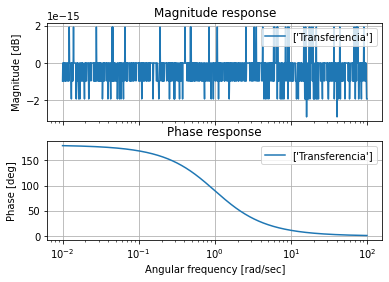

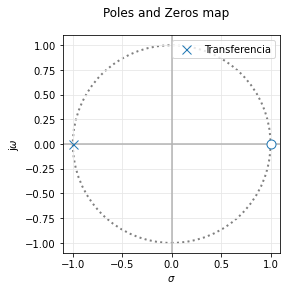

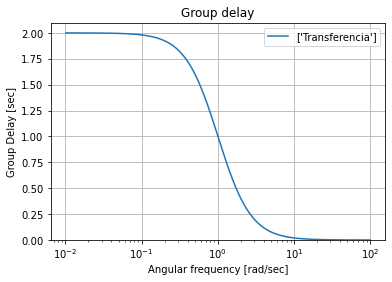

In [1]:
import matplotlib.pyplot as plt
import scipy.signal as sig
import numpy as np
from splane import analyze_sys

num = [1,-1]
den = [1,1]

transfer_f = sig.TransferFunction(num, den)

plt.close('all')
analyze_sys(transfer_f, 'Transferencia')

### b)

#### Topología Pasiva

Para poder obtener este tipo de transferencia con una red pasiva, implementamos una red lattice:

<div><img src="img/red_lattice.jpeg" width="500"/></div>


Para que la red sea simétrica, asumo:

* $Z_1 = Z_4$
* $Z_2 = Z_3$

$ T(s) = \frac{V_2}{V_1} = \frac{Z_2 - Z_1}{Z_1 + Z_2} $

Utilizando:

* $Z_1 = \frac{1}{sC}$
* $Z_2 = R$

$ T(s) = \frac{R - \frac{1}{sC}}{\frac{1}{sC} + R} $

$ T(s) = \frac{\frac{s.R.C - 1}{sC}}{\frac{1 + s.R.C}{s.C}}$

$ T(s) = \frac{s - \frac{1}{R.C}}{s + \frac{1}{R.C}}$

Para obtener los valores de los componetes, planteamos:

Siendo $\alpha$ el aporte de fase de los ceros y $\beta$ el aporte de fase de los polos:

* $\alpha + \beta = 180º$
* $\alpha - \beta = 180º-15º = 165º$

$\beta = \alpha - 165º$

$2.\alpha = 180º + 165º$

$\alpha = \frac{345º}{2}$

$\alpha = 172,5º$

$\beta = 7,5º$

Siendo $\tau$ la constante de tiempo:

$Tg(\beta) = \frac{1}{\tau}$

$\tau = \frac{1}{Tg(\beta)}$

$\tau = 7,59$

Recordando que:

$\tau = \frac{1}{R.C}$

Y suponiendo un valor de $C = 1$

$R = \frac{1}{\tau}$

$R = 0,1316$

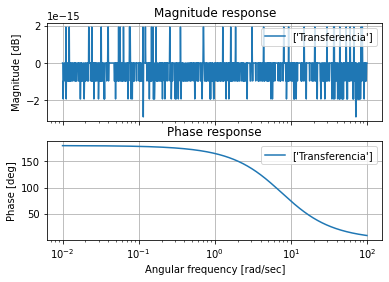

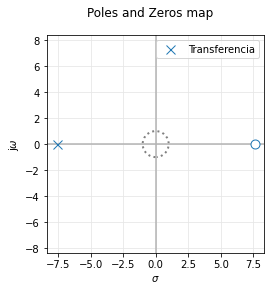

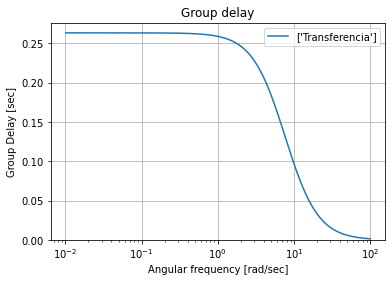

In [2]:
# Simulación numérica

C = 1
R = 0.1316

num = [1,-(1/R*C)]
den = [1,(1/R*C)]

transfer_f = sig.TransferFunction(num, den)

plt.close('all')
analyze_sys(transfer_f, 'Transferencia')

#### Simulación Circuital

!["Circuito_pasivo"](img/ej1_circuito_pasivo.JPG)

!["Transferencia"](img/ej1_transferencia_pasivo.JPG)

!["Cursores"](img/ej1_cursores_pasivo.JPG)

Se puede ver que en el cursor, marca que cuando la fase es $165$ el valor de la frecuencia es $f = 158,85467mHz$

Si calculamos la frecuencia angular:

$\omega = 2.\pi.f = 2.\pi.(158,85467.10^{-3})$

$\omega = 0,998 \approx 1$

#### Topología activa

Para la topología activa implementamos un circuito rotador de fase, cuya transferencia está determinada por:

$T(s) = \frac{V_2}{V_1} = \frac{Y_1 . G_2 - Y_2 . G_1}{G_2 . (Y_1 + Y_2)}$

$G_1 = \frac{1}{R_1}$

$G_2 = \frac{1}{R_2}$

<div><img src="img/rotador_de_fase.jpeg" width="500"/></div>

Para que el girador se comporte como un pasa-todo:

* $Y_1 = s.C$
* $Y_2 = G = \frac{1}{R}$
* $\frac{G_1}{G_2} = 1$

$T(s) = \frac{V_2}{V_1} = \frac{s.C.G_2 - G.G_1}{G_2 . (s.C + G)}$

$T(s) = \frac{G_1}{G_2} . \frac{s.C.\frac{G_2}{G_1}-G}{s.C + G}$

$T(s) = \frac{C}{C} . \frac{s - \frac{G}{C}}{s + \frac{G}{C}}$

$T(s) = \frac{s - \frac{1}{R.C}}{s + \frac{1}{R.C}}$

Implementamos los mismos valores que se utilizaron para la red pasiva.

#### Simulación circuital

!["Circuito_activo"](img/ej1_circuito_activo.JPG)

!["Transferencia_activo"](img/ej1_transferencia_activo.JPG)

!["Cursores_activo"](img/ej1_cursores_activo.JPG)


## Ejercicio 2

Considere la siguiente expresión generalizada de una transferencia bicuadrática:

$T(s) = k . \frac{s^2 + s . \frac{\omega_z}{Q_z} + \omega_z^2}{s^2 + s . \frac{\omega_p}{Q_p} + \omega_p^2}$

Considerando que el denominador de $T(s)$ se corresponde con el de un filtro pasa-altos Butterworth de segundo orden:

$Den\{T(s)\} = s^2 + s . \sqrt{2} + 1$

Especifique las condiciones necesarias para los parámetros $k$, $Q_z$, $\omega_z$, $Q_p$, y $\omega_p$ de forma tal que la transferencia final resulte:

!["Consignas"](img/ej2_consignas.JPG)

Para la simulación circuital considero el siguiente circuito:

!["Circuito_genérico"](img/ej2_circuito_generico.JPG)

La transferencia de este circuito se expresa como:

$T(s) = a . \frac{s^2 + s . \frac{b}{a} . \frac{1}{R.C} + \frac{d}{a} . \frac{1}{L.C}}{s^2 + s . \frac{1}{R.C} + \frac{1}{L.C}}$

a) La transferencia tiene forma de notch pasa-bajos, cuya función de transferencia correspondiente es:

$T(s) = \frac{s^2+\omega_z^2}{s^2 + s . \sqrt{2} + 1}$

$\omega_z$ corresponde a la frecuencia eliminada. En este caso $\omega_z = 2$

Se puede decir que no hay $Q_z$ o que $Q_z \rightarrow \infty$

$T(s) = k .\frac{s^2+2^2}{s^2 + s . \sqrt{2} + 1}$

Al simular con $k = 1$ la transferencia queda desplazada aproximadamente $12dB$ hacia arriba.

$-12dB = 20 . log(k)$

$k = 10^{\frac{-12}{10}} \approx 0,25$

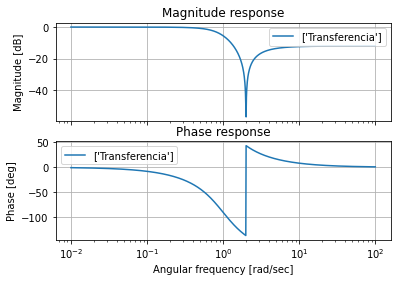

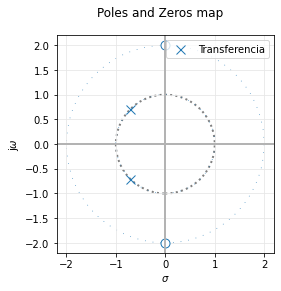

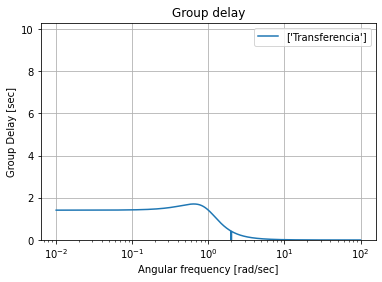

In [3]:
# Simulación numérica
wz = 2
wp = 1
Qp = 1/(np.sqrt(2))
k = 0.25
num = [k*1,k*0,k*4]
den = [1,(1/Qp),1]

transfer_f = sig.TransferFunction(num, den)

plt.close('all')
analyze_sys(transfer_f, 'Transferencia')

Para la simulación circuital:

$T(s) = 0,25 .\frac{s^2+2^2}{s^2 + s . \sqrt{2} + 1} = a . \frac{s^2 + s . \frac{b}{a} . \frac{1}{R.C} + \frac{d}{a} . \frac{1}{L.C}}{s^2 + s . \frac{1}{R.C} + \frac{1}{L.C}}$

$a = 0.25$

$b = 0$

$\frac{1}{L.C} = 1$

$\frac{d}{0,25} . 1 = 4$

$d = 1$

!["circuito_a"](img/ej2_a_circuito.JPG)

!["transferencia_a"](img/ej2_a_transferencia.JPG)

b) La transferencia tiene forma de Notch, cuya función transferencia correspondiente es:

$T(s) = k . \frac{s^2 - s . \frac{\omega_z}{Q_z} + \omega_z^2}{s^2 + s . \sqrt{2} + 1}$

Para que sea una transferencia eliminabanda los coeficientes de ambos polinomios deben ser los mismos, excepto el del término lineal:

$\omega_z = \omega_p = 1$

El valor que indica cuánto atenua la banda eliminada tiene que ver con la relación entre los coeficientes del término lineal.

$-6dB = 20 . log(a)$

$a = 0,5$

$Q_z = Q_p . \frac{1}{a} = \frac{1}{\sqrt{2}} . \frac{1}{0.5} = \frac{2}{\sqrt{2}}$

Para esta transferencia: $k = 1$

$T(s) = 1 . \frac{s^2 - s . \frac{\sqrt{2}}{2} + 1}{s^2 + s . \sqrt{2} + 1}$

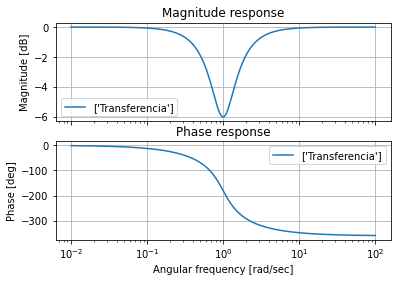

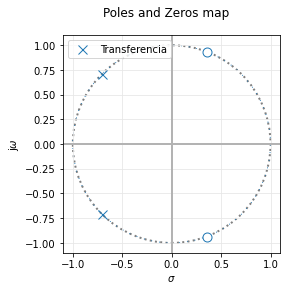

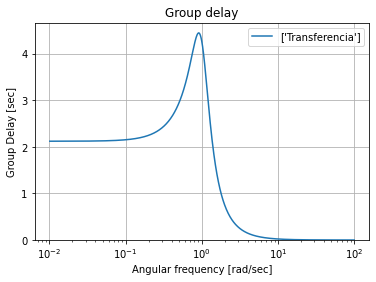

In [4]:
# Simulación numérica
wz = 1
wp = 1
Qz = 2/(np.sqrt(2))
Qp = 1/(np.sqrt(2))
k = 1
num = [k*1,-k*(1/Qz),k*1]
den = [1,(1/Qp),1]

transfer_f = sig.TransferFunction(num, den)

plt.close('all')
analyze_sys(transfer_f, 'Transferencia')

Para la simulación circuital:

$T(s) = 1 . \frac{s^2 - s . \frac{\sqrt{2}}{2} + 1}{s^2 + s . \sqrt{2} + 1} = a . \frac{s^2 + s . \frac{b}{a} . \frac{1}{R.C} + \frac{d}{a} . \frac{1}{L.C}}{s^2 + s . \frac{1}{R.C} + \frac{1}{L.C}}$

$\frac{1}{L.C} = 1$

$a = 1$

$\frac{d}{a} = 1$

$d = 1$

$\frac{1}{R.C} = \sqrt{2}$

Supongo:

$L = 1$

$C = 1$

$R = \frac{1}{\sqrt{2}}$

$\frac{b}{a} . \frac{1}{R.C} = \frac{\sqrt{2}}{2}$

$b = \frac{1}{2}$

!["circuito_b"](img/ej2_b_circuito.JPG)

!["transferencia_b"](img/ej2_b_transferencia.JPG)

c) El desarrollo de fase de $2\pi$ corresponde a un pasa-todo de segundo orden, cuya transferencia corresponde a:

$T(s) = \frac{s^2 - s .\frac{\omega_z}{Q_z} + \omega_z^2}{s^2 + s .\frac{\omega_p}{Q_p} + \omega_p^2}$

El gráfico indica que para el desarrollo de $\pi$ el valor de $\omega$ es: $\omega = 0,5$

Esto no cumple con la consigna de que el denominador corresponde a un butterworth de 2do orden.

$T(s) = \frac{s^2 - s .\frac{\sqrt{2}}{2} + 0.5^2}{s^2 + s .\frac{\sqrt{2}}{2} + 0.5^2}$

Para esta transferencia: $k = 1$

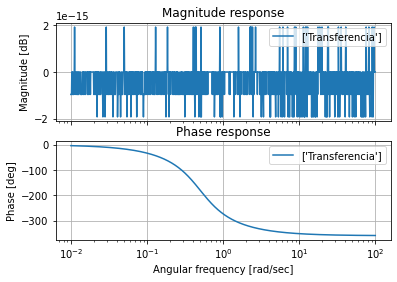

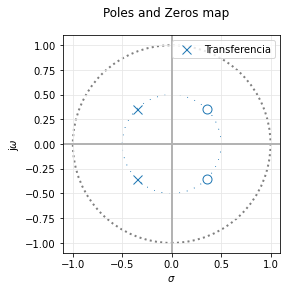

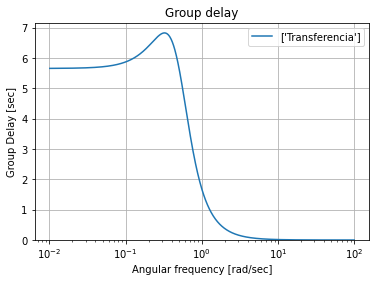

In [5]:
# Simulación numérica
wz = 0.5
wp = 0.5
Qz = 1/(np.sqrt(2))
Qp = 1/(np.sqrt(2))
k = 1
num = [k*1,-k*(wz/Qz),k*(wz**2)]
den = [1,(wp/Qp),wp**2]

transfer_f = sig.TransferFunction(num, den)

plt.close('all')
analyze_sys(transfer_f, 'Transferencia')

Simulación circuital:

Para el pasa todo utilizamos un circuito lattice simétrico.

$T(s) = \frac{Z_2 - Z_1}{Z_1 + Z_2}$

Planteando:

$Z_1 = R$

$Z_2 = \frac{1}{S.C} + S . L$

La transferencia queda:
$T(s) = \frac{s^2 - s .\frac{\sqrt{2}}{2} + 0.5^2}{s^2 + s .\frac{\sqrt{2}}{2} + 0.5^2} = \frac{s^2 - s . \frac{R}{L} + \frac{1}{L.C}}{s^2 + s . \frac{R}{L} + \frac{1}{L.C}}$

$\frac{1}{L.C} = 0.25$

$\frac{R}{L} = \frac{\sqrt{2}}{2}$

Supongo $C = 1$

$L = \frac{1}{0.25} = 4$

$R = L . \frac{\sqrt{2}}{2} = 2 . \sqrt{2} \approx 2,8284$

!["circuito_c"](img/ej2_c_circuito.JPG)

!["transferencia_c"](img/ej2_c_transferencia.JPG)

d) El desarrollo de fase de esta transferencia corresponde a un Notch pasa-bajos, donde $\omega_z = 3$:

$T(s) = k . \frac{s^2 + 4^2}{s^2 + s \sqrt{2} + 1}$

Para esta transferencia: $k = 1$

$T(s) = \frac{s^2 + 4^2}{s^2 + s \sqrt{2} + 1}$

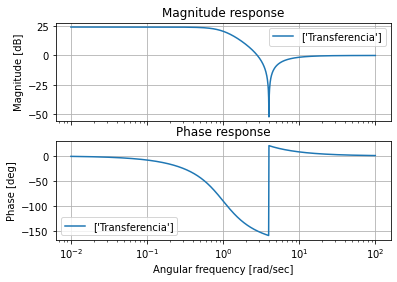

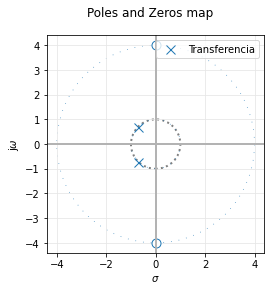

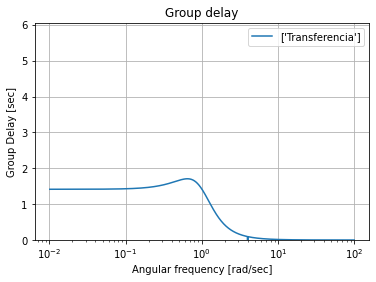

In [8]:
# Simulación numérica
wz = 4
wp = 1
Qp = 1/(np.sqrt(2))
k = 1
num = [k*1,-k*0,k*(wz**2)]
den = [1,(wp/Qp),wp**2]

transfer_f = sig.TransferFunction(num, den)

plt.close('all')
analyze_sys(transfer_f, 'Transferencia')

Para la simulación circuital:

$T(s) = 1 .\frac{s^2 + 4^2}{s^2 + s \sqrt{2} + 1} = a . \frac{s^2 + s . \frac{b}{a} . \frac{1}{R.C} + \frac{d}{a} . \frac{1}{L.C}}{s^2 + s . \frac{1}{R.C} + \frac{1}{L.C}}$

$a = 1$

$b = 0$

$\frac{1}{L.C} = 1$

$\frac{d}{1} . 1 = 16$

$d = 16$

Este circuito no puede implementarse con el circuito pasivo propuesto inicialmente ya que el inductor en derivación se calcula como:

$\frac{L}{1-d}$

y como $d>0$ eso daría un valor de inductor negativo.

## Ejercicio 3

Dada la siguiente respuesta de fase de una transferencia:

$\Phi(\omega) = \frac{\pi}{2} - arctg(\frac{6.\omega}{-\omega^2+4})$

a) Obtener la expresión de F(s).

b) Graficar el diagrama de polos y ceros, y con el mismo, verificar la respuesta de fase en extremos de banda.

c) Obtener un circuito equivalente pasivo que implemente dicha respuesta.

Planteo:

$F(j\omega) = |F(j\omega)| . e^{j\phi(j\omega)}$

$F(-j\omega) = |F(j\omega)| . e^{-j\phi(j\omega)}$

$\frac{F(j\omega)}{F(-j\omega)} = \frac{e^{j\phi(j\omega)}}{e^{-j\phi(j\omega)}}$

Descompongo la función exponencial en funciones trigonométricas:

$\frac{F(j\omega)}{F(-j\omega)} = \frac{cos(\phi(j\omega))+j sen(\phi(j\omega))}{cos(\phi(j\omega))-j sen(\phi(j\omega))}$

$\frac{F(j\omega)}{F(-j\omega)} = \frac{1+j\frac{sen(\phi(j\omega))}{cos(\phi(j\omega))}}{1-j\frac{sen(\phi(j\omega))}{cos(\phi(j\omega))}}$

$\frac{F(j\omega)}{F(-j\omega)} = \frac{1+j tg(\phi(j\omega))}{1-j tg(\phi(j\omega))}$

$F(j\omega) . (1-j tg(\phi(j\omega))) = F(-j\omega) . (1+j tg(\phi(j\omega)))$

$F(j\omega)-j F(j\omega) . tg(\phi(j\omega)) = F(-j\omega) +j F(-j\omega) . tg(\phi(j\omega))$

$F(j\omega) - F(-j\omega) = j tg(\phi(j\omega)) . (F(j\omega) + F(-j\omega))$

$j tg(\phi(j\omega)) = \frac{F(j\omega) - F(-j\omega)}{F(j\omega) + F(-j\omega)}$

$j tg(\phi(j\omega)) = \frac{img\{F(j\omega)\}}{real\{F(j\omega)\}}$

Sabemos que la fase se puede expresar como el aporte de los ceros menos el aporte de los polos:

$\phi(\omega) = \frac{\pi}{2} - arctg(\frac{6.\omega}{-\omega^2+4})$

Donde:

$\frac{\pi}{2}$ corresponde al aporte de los ceros. Implica un cero en el origen que aporta $\frac{\pi}{2}$ para todo valor de $\omega$

$arctg(\frac{6.\omega}{-\omega^2+4})$ corresponde al aporte de los polos.

$j tg(arctg(\frac{6.\omega}{-\omega^2+4})) = \frac{img\{F(j\omega)\}}{real\{F(j\omega)\}}$

$\omega = \frac{s}{j}$

$j . \frac{6 . \frac{s}{j}}{-(\frac{s}{j})^2+4} = \frac{img\{F(j\omega)\}}{real\{F(j\omega)\}}$

$\frac{6 . s}{s^2 + 4} = \frac{img\{F(j\omega)\}}{real\{F(j\omega)\}}$

$Den\{F(s)\} = s^2 + s . 6 + 4$

Finalmente:

$F(s) = \frac{s}{s^2 + s . 6 + 4}$

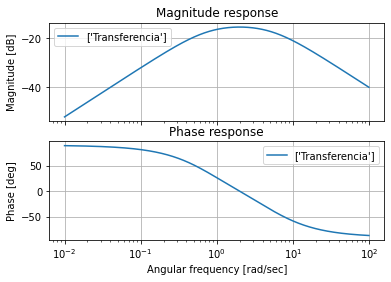

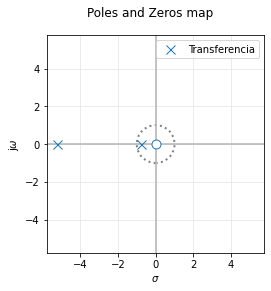

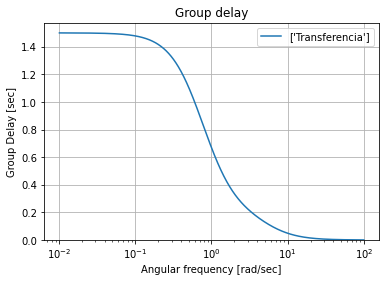

In [9]:
num = [1,0]
den = [1,6,4]

transfer_f = sig.TransferFunction(num, den)

plt.close('all')
analyze_sys(transfer_f, 'Transferencia')

Simulación circuital

Planteo:

$F(s) = a . \frac{s^2 + s . \frac{b}{a} . \frac{1}{R.C} + \frac{d}{a} . \frac{1}{L.C}}{s^2 + s . \frac{1}{R.C} + \frac{1}{L.C}}$

Distribuyendo $a$:

$F(s) = \frac{s^2 . a + s . b . \frac{1}{R.C} + d . \frac{1}{L.C}}{s^2 + s . \frac{1}{R.C} + \frac{1}{L.C}}$

$F(s) = \frac{s}{s^2 + s . 6 + 4} = \frac{s^2 . a + s . b . \frac{1}{R.C} + d . \frac{1}{L.C}}{s^2 + s . \frac{1}{R.C} + \frac{1}{L.C}}$


$a = 0$

$d = 0$

$\frac{1}{R.C} = 6$

$b . \frac{1}{R.C} = 1$

$b . 6 = 1$

$b = \frac{1}{6}$

$\frac{1}{L.C} = 4$

Asumo $C = 1$

$R = \frac{1}{6}$

$L = \frac{1}{4}$


!["circuito"](img/ej3_circuito.JPG)

!["transferencia"](img/ej3_transferencia.JPG)